In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Q1

In [2]:
data = pd.read_csv("heart_disease.csv")

print("Columns in dataset:", data.columns)
correlations = data.corr(numeric_only=True)['target'].drop('target')
top_5_features = correlations.abs().sort_values(ascending=False).head(5)
print(top_5_features)



Columns in dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
ca         0.382085
Name: target, dtype: float64


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Q2

Box-Cox λ values and shifts:
oldpeak: λ = 0.1797, shift = 0.0001
exang: λ = -0.2281, shift = 0.0001
cp: λ = 0.0153, shift = 0.0001
thalach: λ = 2.1716, shift = 0
ca: λ = -0.0822, shift = 0.0001


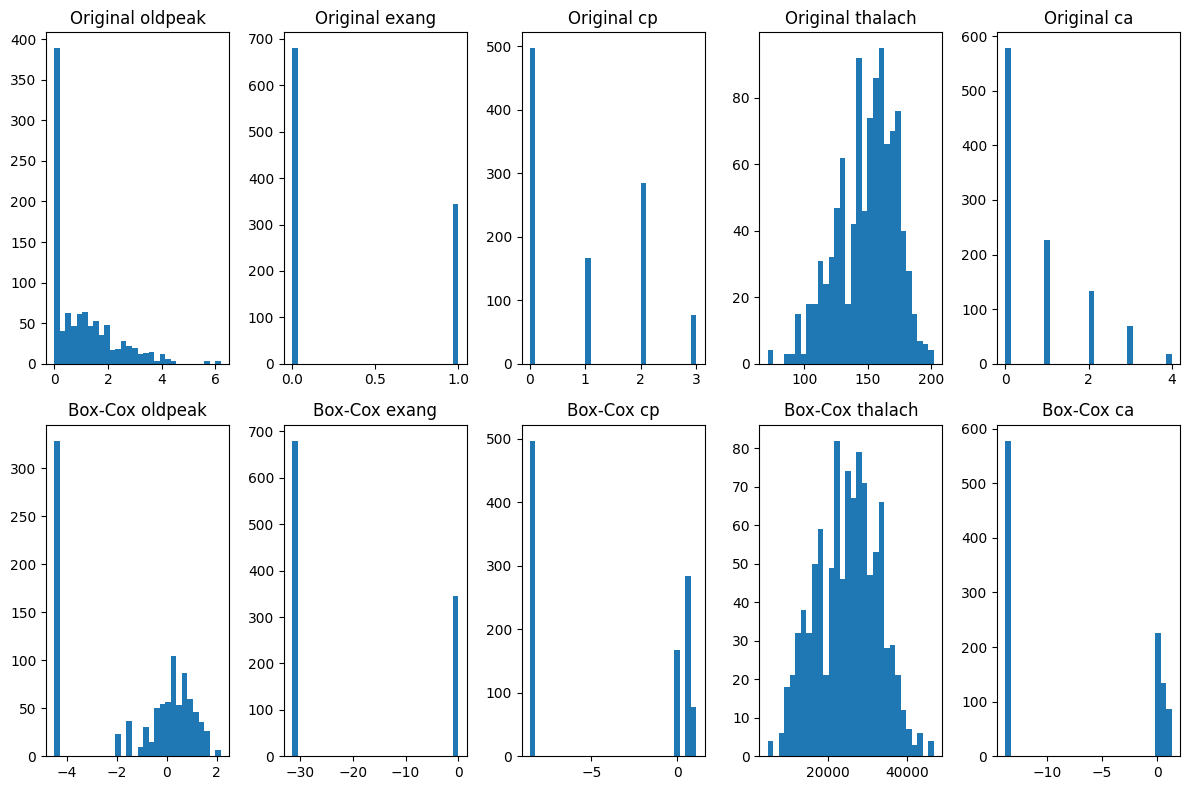

In [ ]:
from scipy.stats import boxcox
import numpy as np
import pandas as pd


cols_to_transform = ['oldpeak', 'exang', 'cp', 'thalach', 'ca']

data_boxcox = data.copy()


lambdas = {}

for col in cols_to_transform:
    col_data = data_boxcox[col]
    
   
    if (col_data <= 0).any():
        shift = abs(col_data.min()) + 1e-4
        col_data = col_data + shift
    else:
        shift = 0

    transformed, lam = boxcox(col_data)
    data_boxcox[col] = transformed
    lambdas[col] = (lam, shift)

print("Box-Cox λ values and shifts:")
for col, (lam, shift) in lambdas.items():
    print(f"{col}: λ = {lam:.4f}, shift = {shift}")


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_transform):
    plt.subplot(2, 5, i+1)
    plt.hist(data[col], bins=30)
    plt.title(f"Original {col}")
    
    plt.subplot(2, 5, i+6)
    plt.hist(data_boxcox[col], bins=30)
    plt.title(f"Box-Cox {col}")

plt.tight_layout()
plt.show()


## Q3

In [10]:
data['age_binned'] = pd.cut(data['age'], bins=5, labels=False)
print("\nDataFrame with Age Binning column:")
print(data[['age', 'age_binned']].head())


DataFrame with Age Binning column:
   age  age_binned
0   52           2
1   53           2
2   70           4
3   61           3
4   62           3


## Q4

In [11]:
correlation_matrix = data.corr()
chol_correlations = correlation_matrix['chol'].drop('chol')
most_orthogonal_feature = chol_correlations.abs().idxmin()
print(f"\nThe most orthogonal feature to 'chol' is: {most_orthogonal_feature}")


The most orthogonal feature to 'chol' is: slope
